In [ ]:
# import os
# os.chdir("D:\ml")

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from string import punctuation, digits
import nltk
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop = set(stopwords.words('russian'))


import torch
import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('reviews_v_kr.csv', encoding = 'utf-8', names = ['name', 'date', 'text', 'class'])
df

,name,date,text,class
0,Аврора,03.05.2017,Летел Авророй Владивосток Хабаровск. А 319. Са...,positiv
1,Аврора,01.05.2017,Летела с 30 апреля по 1 мая с пересадкой через...,negativ
2,Аврора,24.04.2017,Летели по маршруту магадан-хабаровск и обратно...,positiv
3,Аврора,04.04.2017,"Рейс 5640 за 04.04.2017 \rПотеряли 1 плед, 20 ...",negativ
4,Аврора,19.03.2017,Никому не советую пользоваться услугами данной...,negativ
...,...,...,...,...
53220,Ямал,13.05.2021,Никакой лояльности по отношению к клиенту. Раз...,negativ
53221,Ямал,04.05.2021,Летела 29.04.21.из Москвы в Тюмень.Хочу вырази...,positiv
53222,Ямал,03.05.2021,"Не понятно за что деньги только дерут, ничего ...",negativ
53223,Ямал,30.04.2021,"Много летал и летаю, раз 100500)..но как сегод...",positiv


## Анализ

In [ ]:
df.isna().sum() # no null

name     0
date     0
text     0
class    0
dtype: int64

In [ ]:
print('There are {} rows and {} columns'.format(df.shape[0],df.shape[1]))

There are 53225 rows and 4 columns


In [ ]:
df.dtypes

name     object
date     object
text     object
class    object
dtype: object

In [ ]:
ng_len = df['class'].value_counts()['negativ']
pt_len = df['class'].value_counts()['positiv']
nu_len = df['class'].value_counts()['neutral']
print('', ng_len, ' негативных отзывов\n', pt_len, ' позитивных отзывов\n', nu_len, ' нейтральных отзывов\n')

 27871  негативных отзывов
 19914  позитивных отзывов
 5440  нейтральных отзывов



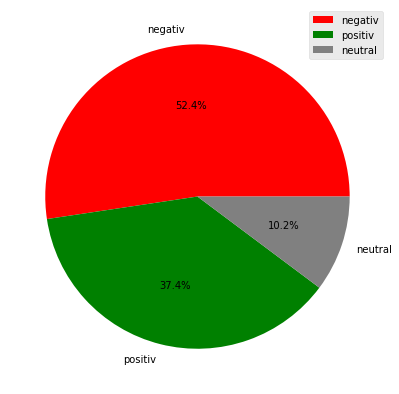

In [ ]:
counts = (df['class'].value_counts()).to_dict()
x = list(counts.values())
labels = list(counts.keys())
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(x, labels=labels, explode = (0, 0, 0), autopct='%1.1f%%', colors = ['red','green','grey'])
ax1.legend(loc='best')
plt.show()

In [ ]:
categorical_columns= ['name']
for column in categorical_columns:
    print('Признак: {}, кол-во уникальных значений: {}'.format(column,df[column].nunique()))
    print('Уникальные значения: ')
    print(df[column].value_counts(), '\n')

Признак: name, кол-во уникальных значений: 43
Уникальные значения: 
Победа                                 7549
Уральские авиалинии                    7484
Северный ветер                         5502
Сибирь                                 4783
Аэрофлот                               4509
Азур Эйр                               4179
Ютэйр                                  3280
Ред Вингс                              2818
Россия                                 2706
Роял Флайт                             1820
Азимут                                 1181
Ай Флай                                1119
Якутия                                  937
Ямал                                    900
РусЛайн                                 870
НордСтар                                847
Икар                                    689
ИрАэро                                  617
Алроса                                  482
Ижавиа                                  193
Аврора                                  177
ЮВТ-Аэро

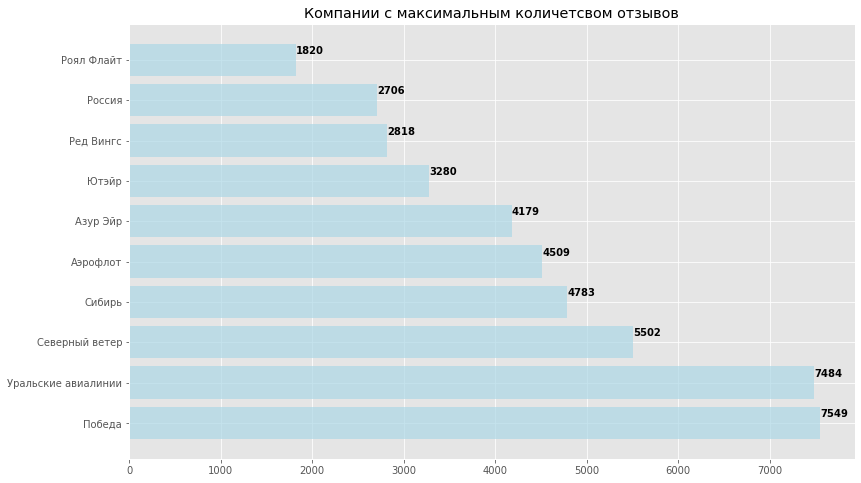

In [ ]:
counts = (df['name'].value_counts()[:10]).to_dict()
vv = list(counts.values())
kk = list(counts.keys())


fig, ax = plt.subplots(figsize=(13, 8)) 
ax.barh(kk, vv, alpha=0.7, color="lightblue")

plt.title('Компании с максимальным количетсвом отзывов')
for i, v in enumerate(vv):
    ax.text(v + 3, i + .15, str(v), fontweight='bold')
plt.show()

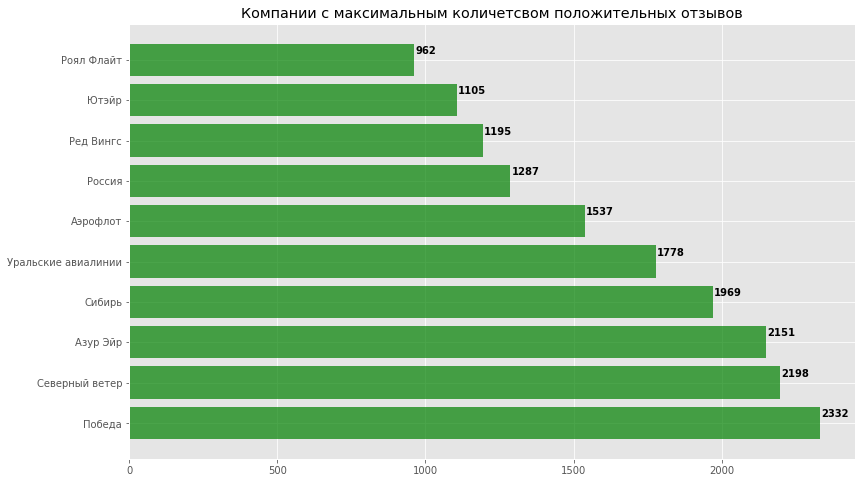

In [ ]:
df_filter = df['class'].isin(['positiv']) 
df221 = df[df_filter]

counts = (df221['name'].value_counts()[:10]).to_dict()
vv = list(counts.values())
kk = list(counts.keys())


fig, ax = plt.subplots(figsize=(13, 8)) 
ax.barh(kk, vv, alpha=0.7, color="green")

plt.title('Компании с максимальным количетсвом положительных отзывов')
for i, v in enumerate(vv):
    ax.text(v + 3, i + .15, str(v), fontweight='bold')
plt.show()

{'Полярные авиалинии': 0.56, 'Ангара': 0.59, 'Алроса': 0.6, 'Космос': 0.62, 'РусДжет': 0.67, 'Газпромавиа': 0.71, 'Оренбуржье': 0.75, 'Вологодское авиационное предприятие': 0.89, 'Костромское авиапредприятие': 0.92, 'Меридиан': 1.0}


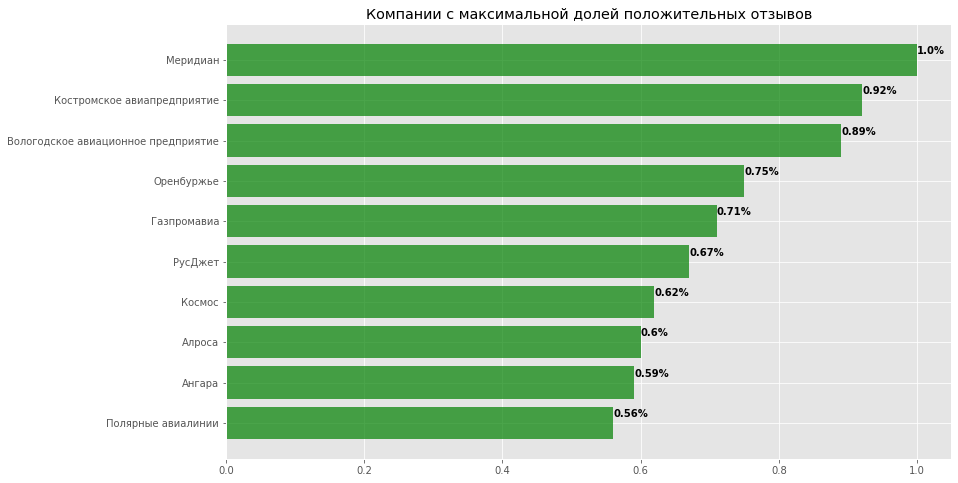

In [ ]:
counts55 = (df221['name'].value_counts()).to_dict()
counts551 = (df['name'].value_counts()).to_dict()

q = {i:round(counts55[i]/counts551[i],2) for i in list(counts55.keys())}
a = dict(sorted(q.items(), key=lambda x: x[1]) )
a = {v:k for k, v in a.items()}
counts = dict(sorted({a[i]:i for i in list(a.keys())[-10:]}.items(), key=lambda x: x[1]) )
print(counts)

vv = list(counts.values())
kk = list(counts.keys())


fig, ax = plt.subplots(figsize=(13, 8)) 
ax.barh(kk, vv, alpha=0.7, color="green")

plt.title('Компании с максимальной долей положительных отзывов')
for i, v in enumerate(vv):
    ax.text(v + .0005, i +.15, str(v)+'%', fontweight='bold')
plt.show()

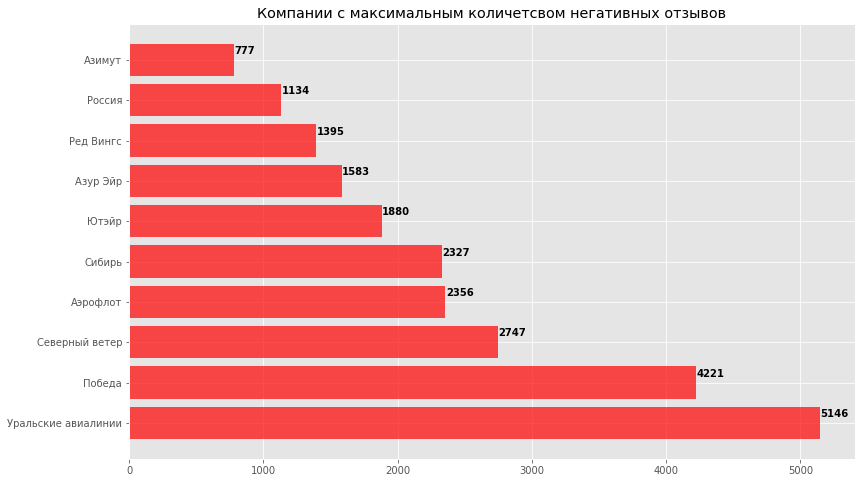

In [ ]:
df_filter = df['class'].isin(['negativ']) 
df222 = df[df_filter]

counts = (df222['name'].value_counts()[:10]).to_dict()
vv = list(counts.values())
kk = list(counts.keys())


fig, ax = plt.subplots(figsize=(13, 8)) 
ax.barh(kk, vv, alpha=0.7, color="red")

plt.title('Компании с максимальным количетсвом негативных отзывов')
for i, v in enumerate(vv):
    ax.text(v + 3, i + .15, str(v), fontweight='bold')
plt.show()

{'КрасАвиа': 0.55, 'Тулпар Эйр': 0.56, 'ИрАэро': 0.57, 'Хабаровские авиалинии': 0.62, 'Комиавиатранс': 0.65, 'Азимут': 0.66, 'Якутия': 0.68, 'РусЛайн': 0.69, 'Чукотавиа': 0.73, 'ПАНХ': 1.0}


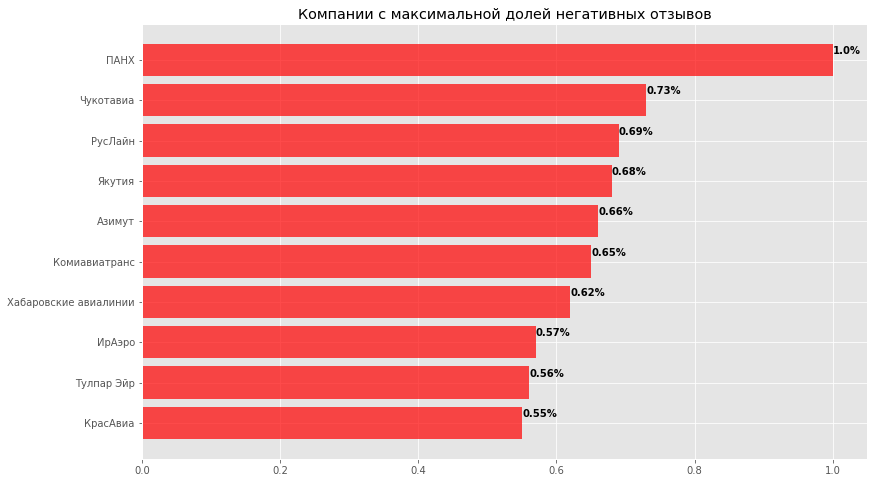

In [ ]:
counts55 = (df222['name'].value_counts()).to_dict()
counts551 = (df['name'].value_counts()).to_dict()

q = {i:round(counts55[i]/counts551[i],2) for i in list(counts55.keys())}
a = dict(sorted(q.items(), key=lambda x: x[1]) )
a = {v:k for k, v in a.items()}
counts = dict(sorted({a[i]:i for i in list(a.keys())[-10:]}.items(), key=lambda x: x[1]) )
print(counts)

vv = list(counts.values())
kk = list(counts.keys())


fig, ax = plt.subplots(figsize=(13, 8)) 
ax.barh(kk, vv, alpha=0.7, color="red")

plt.title('Компании с максимальной долей негативных отзывов')
for i, v in enumerate(vv):
    ax.text(v + .0005, i +.15, str(v)+'%', fontweight='bold')
plt.show()

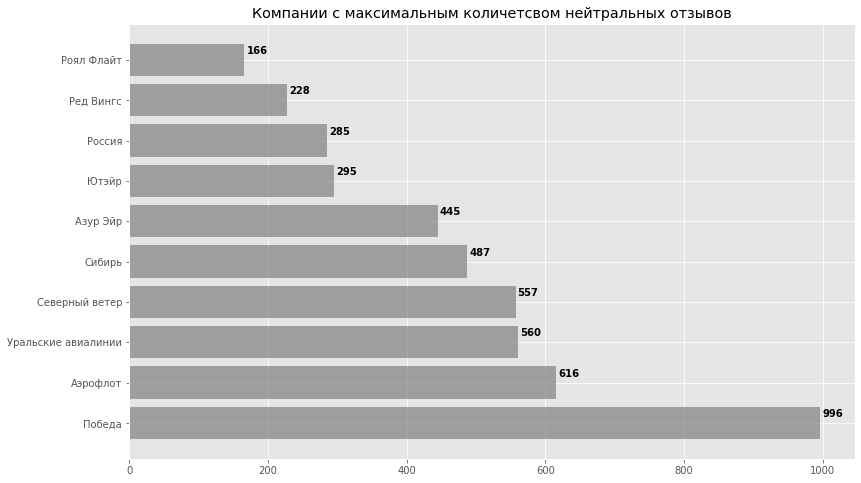

In [ ]:
df_filter = df['class'].isin(['neutral']) 
df223 = df[df_filter]

counts = (df223['name'].value_counts()[:10]).to_dict()
vv = list(counts.values())
kk = list(counts.keys())


fig, ax = plt.subplots(figsize=(13, 8)) 
ax.barh(kk, vv, alpha=0.7, color="grey")

plt.title('Компании с максимальным количетсвом нейтральных отзывов')
for i, v in enumerate(vv):
    ax.text(v + 3, i + .15, str(v), fontweight='bold')
plt.show()

{'Газпромавиа': 0.1, 'Вологодское авиационное предприятие': 0.11, 'Икар': 0.12, 'Победа': 0.13, 'Аврора': 0.14, 'Северсталь': 0.17, 'Чукотавиа': 0.18, 'Оренбуржье': 0.19, 'Хабаровские авиалинии': 0.25, 'РусДжет': 0.33}


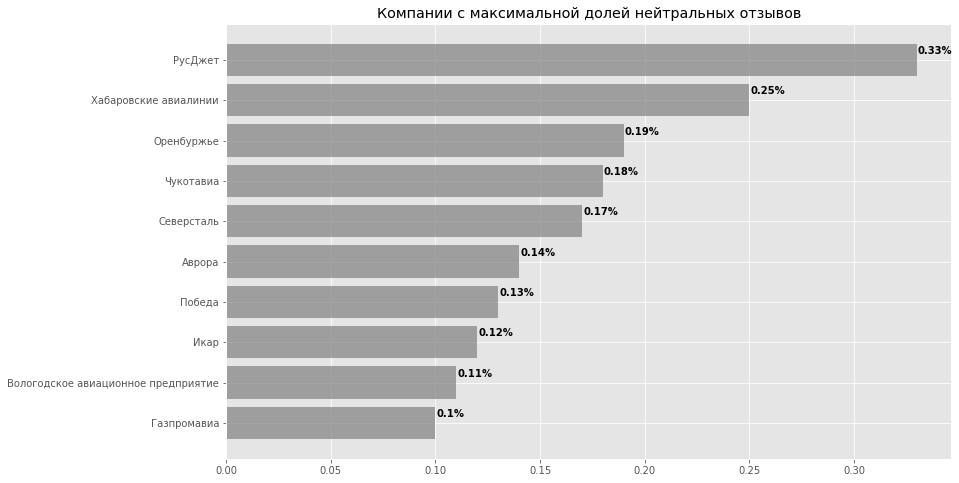

In [ ]:
counts55 = (df223['name'].value_counts()).to_dict()
counts551 = (df['name'].value_counts()).to_dict()

q = {i:round(counts55[i]/counts551[i],2) for i in list(counts55.keys())}
a = dict(sorted(q.items(), key=lambda x: x[1]) )
a = {v:k for k, v in a.items()}
counts = dict(sorted({a[i]:i for i in list(a.keys())[-10:]}.items(), key=lambda x: x[1]) )
print(counts)

vv = list(counts.values())
kk = list(counts.keys())


fig, ax = plt.subplots(figsize=(13, 8)) 
ax.barh(kk, vv, alpha=0.7, color="grey")

plt.title('Компании с максимальной долей нейтральных отзывов')
for i, v in enumerate(vv):
    ax.text(v + .0005, i +.15, str(v)+'%', fontweight='bold')
plt.show()

.


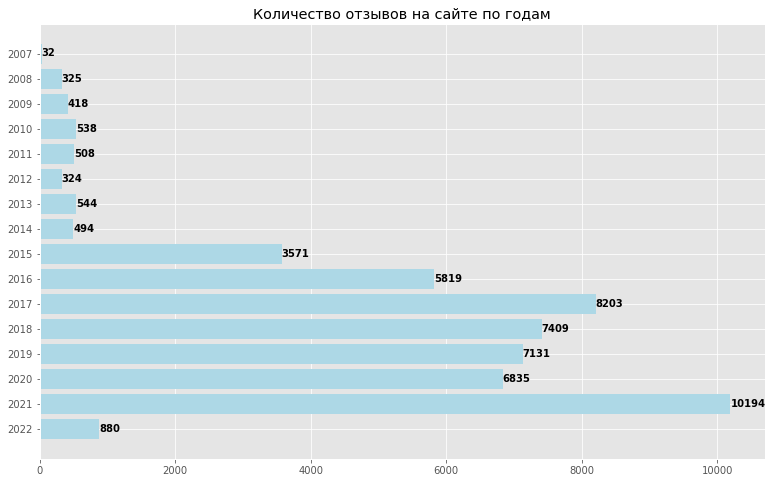

In [ ]:
df23 = df
ll = []
for i in df23['date']:
    if type(i)==str: 
        ll.append(int(i[6:10])) 
    else:
        ll.append(math.nan)
df23['year'] = ll
df23.dropna(subset=['year'])
print('.')

fig, ax = plt.subplots(figsize=(13, 8)) 
years = df23.year[df.year!=0].value_counts() 
 
plt.barh(years.index, years.values, color='lightblue') 

ax.invert_yaxis()# от 2007 до 2022
plt.yticks(years.index)
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)), 
             fontsize=10, fontweight='bold') 

ax.set_title('Количество отзывов на сайте по годам')
plt.show()

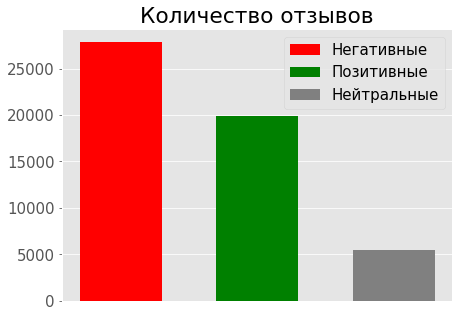

In [ ]:
# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 15
plt.bar(10, ng_len, 3, label="Негативные", color='red')
plt.bar(15, pt_len, 3, label="Позитивные", color='green')
plt.bar(20, nu_len, 3, label="Нейтральные", color='grey')
plt.legend()
plt.title('Количество отзывов')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()

In [ ]:
df['class'] = df['class'].map({'negativ':1, 'positiv':2, 'neutral':3}) 

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
df['length'] = df['text'].apply(length)

In [ ]:
df.head()

,name,date,text,class,length
0,Аврора,03.05.2017,Летел Авророй Владивосток Хабаровск. А 319. Са...,2,705
1,Аврора,01.05.2017,Летела с 30 апреля по 1 мая с пересадкой через...,1,541
2,Аврора,24.04.2017,Летели по маршруту магадан-хабаровск и обратно...,2,110
3,Аврора,04.04.2017,"Рейс 5640 за 04.04.2017 \rПотеряли 1 плед, 20 ...",1,198
4,Аврора,19.03.2017,Никому не советую пользоваться услугами данной...,1,342


In [ ]:
df['length'].max()

18743

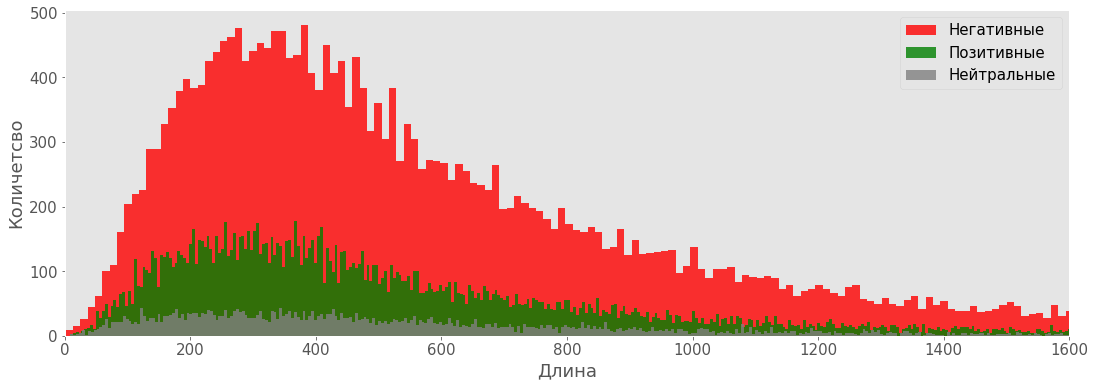

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.rcParams['font.size'] = 15

bins = 1600
plt.hist(df[df['class'] == 1]['length'], alpha = 0.8, bins=bins, label='Негативные', color='red')
plt.hist(df[df['class'] == 2]['length'], alpha = 0.8, bins=bins, label='Позитивные', color='green')
plt.hist(df[df['class'] == 3]['length'], alpha = 0.8, bins=bins, label='Нейтральные', color='grey')

plt.xlabel('Длина')
plt.ylabel('Количетсво')
plt.legend(loc='upper right')
plt.xlim(0,1600)
plt.grid()
plt.show()

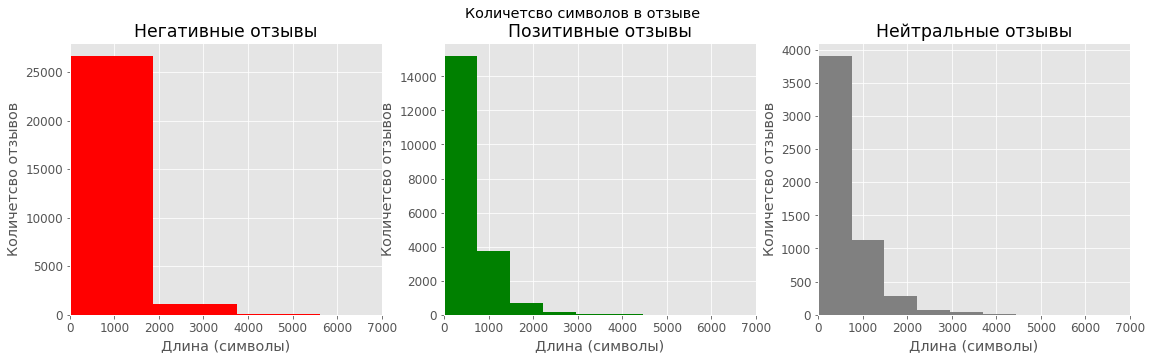

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(19,5))
plt.rcParams['font.size'] = 12
tweet_len=df[df['class']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Негативные отзывы')
ax1.set_xlabel('Длина (символы)')
ax1.set_ylabel('Количетсво отзывов')
ax1.set_xlim(0,7000)
tweet_len=df[df['class']==2]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Позитивные отзывы')
ax2.set_xlabel('Длина (символы)')
ax2.set_ylabel('Количетсво отзывов')
ax2.set_xlim(0,7000)
tweet_len=df[df['class']==3]['text'].str.len()
ax3.hist(tweet_len,color='grey')
ax3.set_title('Нейтральные отзывы')
ax3.set_xlabel('Длина (символы)')
ax3.set_ylabel('Количетсво отзывов')
fig.suptitle('Количетсво символов в отзыве')
ax3.set_xlim(0,7000)
plt.show()

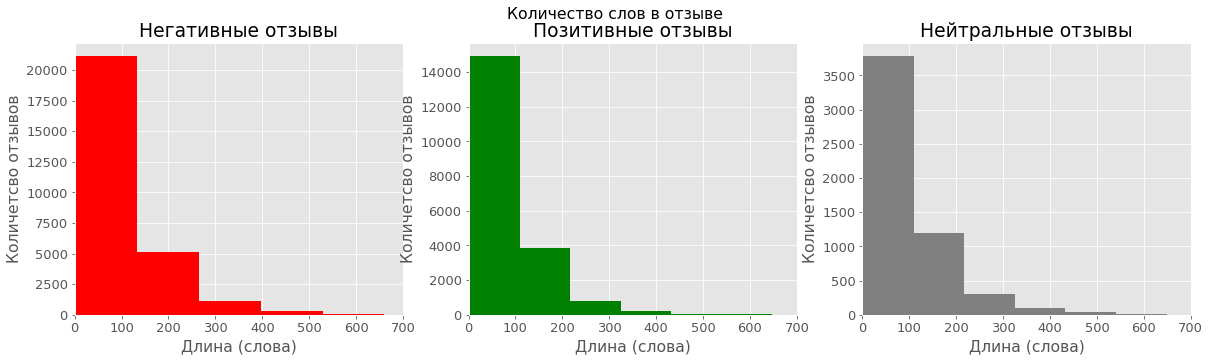

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
plt.rcParams['font.size'] = 13
tweet_len=df[df['class']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Негативные отзывы')
ax1.set_xlabel('Длина (слова)')
ax1.set_ylabel('Количетсво отзывов')
ax1.set_xlim(0,700)
tweet_len=df[df['class']==2]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Позитивные отзывы')
ax2.set_xlabel('Длина (слова)')
ax2.set_ylabel('Количетсво отзывов')
ax2.set_xlim(0,700)
tweet_len=df[df['class']==3]['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='grey')
ax3.set_title('Нейтральные отзывы')
ax3.set_xlabel('Длина (слова)')
ax3.set_ylabel('Количетсво отзывов')
ax3.set_xlim(0,700)
fig.suptitle('Количество слов в отзыве')
plt.show()

Text(0.5, 0.98, 'Средняя длина слов в отзыве')

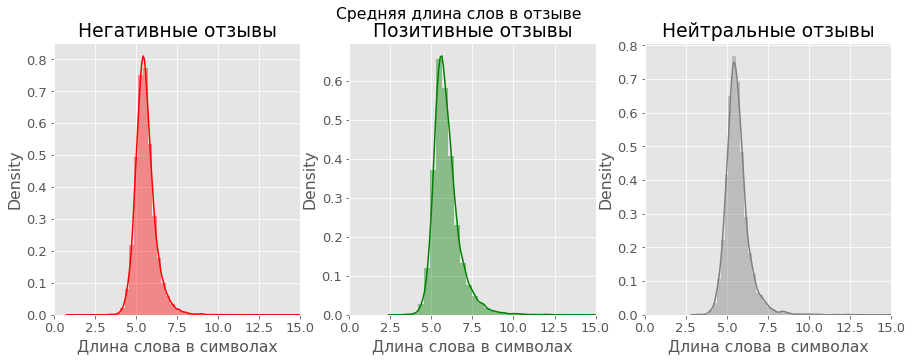

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
plt.rcParams['font.size'] = 13
word=df[df['class']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Негативные отзывы')
ax1.set_xlabel('Длина слова в символах')
#ax1.set_ylabel('Плотность')
ax1.set_xlim(0,15)
word=df[df['class']==2]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Позитивные отзывы')
ax2.set_xlabel('Длина слова в символах')
#ax2.set_ylabel('Плотность')
ax2.set_xlim(0,15)
word=df[df['class']==3]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='grey')
ax3.set_title('Нейтральные отзывы')
ax3.set_xlabel('Длина слова в символах')
#ax3.set_ylabel('Плотность')
ax3.set_xlim(0,15)
fig.suptitle('Средняя длина слов в отзыве')

In [ ]:
def create_corpus(target):
    corpus=[]
    
    for x in df[df['class']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

#### Распространенные стоп-слова в отзывах

Для негативных отзывов

<BarContainer object of 10 artists>

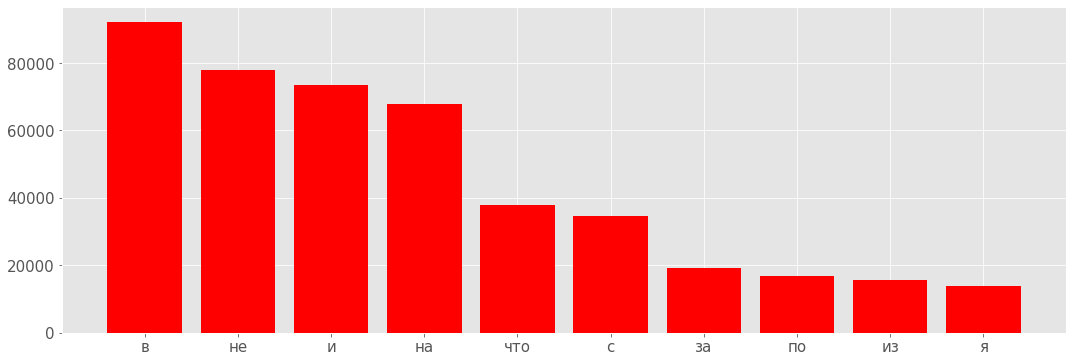

In [ ]:
corpus=create_corpus(1)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.rcParams['font.size'] = 15
x,y = zip(*top)
plt.bar(x, y, color='red')#RebeccaPurple') #MediumPurple

Для позитивных отзывов

<BarContainer object of 10 artists>

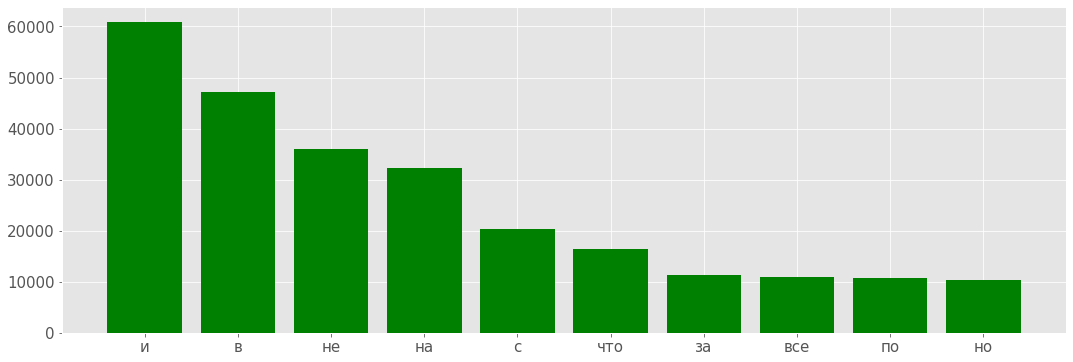

In [ ]:
corpus=create_corpus(2)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.rcParams['font.size'] = 15
x,y = zip(*top)
plt.bar(x, y, color='green')

Для нейтральных отзывов

<BarContainer object of 10 artists>

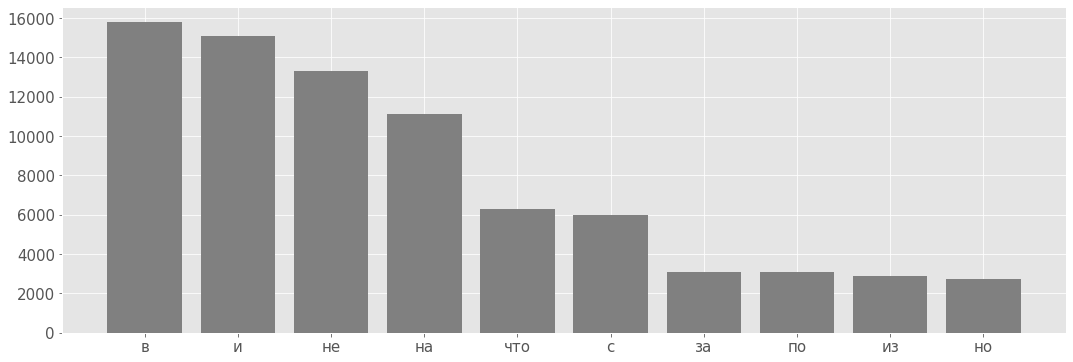

In [ ]:
corpus=create_corpus(3)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.rcParams['font.size'] = 15
x,y = zip(*top)
plt.bar(x, y, color='grey')

#### Распространенная пунктуация в отзывах

<BarContainer object of 10 artists>

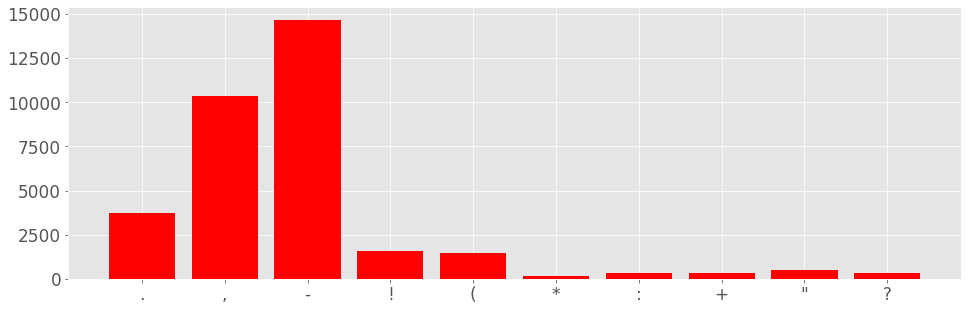

In [ ]:
plt.figure(figsize = (16,5))
plt.rcParams['font.size'] = 17
corpus = create_corpus(1)

dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i] += 1
        
x,y = zip(*dic.items())
plt.bar(x[:10], y[:10], color='red')

<BarContainer object of 10 artists>

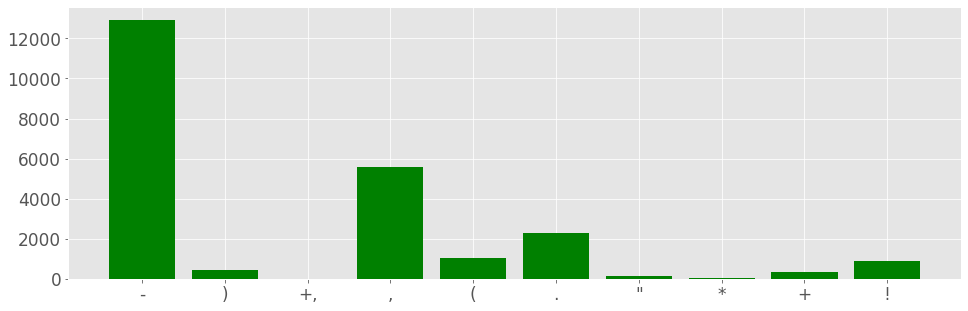

In [ ]:
plt.figure(figsize=(16,5))
plt.rcParams['font.size'] = 17

corpus=create_corpus(2)
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x[:10], y[:10],color='green')

<BarContainer object of 10 artists>

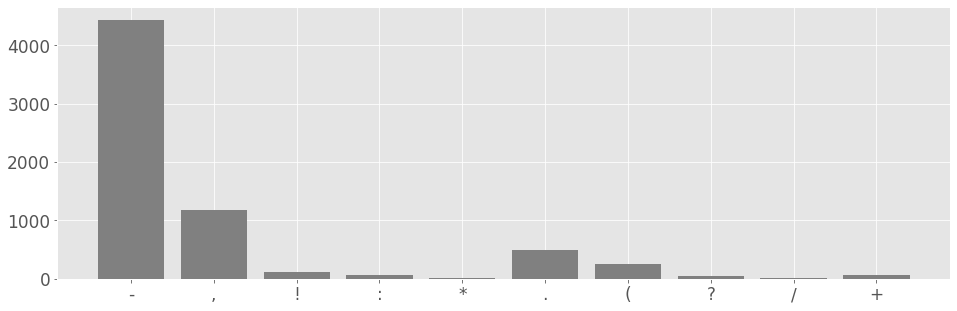

In [ ]:
plt.figure(figsize=(16,5))
plt.rcParams['font.size'] = 17

corpus=create_corpus(3)
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x[:10], y[:10],color='grey')

In [ ]:
def tokenize1(file_text):
    file_text = re.sub(r'(\W)\1{2,}', r'\1', file_text) 
    file_text = re.sub(r'(\w)\1{2,}', r'\1\1', file_text)
    file_text = re.sub(r'(?P<url>https?://[^\s]+)', '', file_text) 
    file_text = re.sub(r"\@(\w+)", '', file_text) 
    file_text = re.sub(r"\#(\w+)", '', file_text) 
    file_text = re.sub(r"\$(\w+)", '', file_text) 
    file_text = file_text.replace("-",' ')
    tokens = word_tokenize(file_text)
    tokens = [i for i in tokens if (i not in string.punctuation)] # удаляем знаки преп 

    stop_words = stopwords.words('russian')
    stop_words.extend(['авиакомпанией', 'ручной','ручную', 'норд', 'южно','сахалинска','сахалинск','мая','хабаровск','хабаровска','авророй','авроры','сеуле','владивосток','плохо','апреля','совершенно', 'окт','интеравиа','прям','берлин','магадан','бомбей','аэрофлотом', 'сих','пор', 'санкт','случайно',"петербург",'аэрофлот','аэрофлота', 'понравился','уральских','москва','часов', 'что', 'очень', 'это', 'так', 'вот', 'быть', 'как', 'в','далее','которого','ку', 'моё', 'её','самом','ими','эта', 'при','нему','поэтому','моем','туда','те', 'ваш','стр','бц','всём','которому','иным', 'мни','щас','ну', 'ля','во''.','...','..','``','*'])
    tokens = [i.lower() for i in tokens if (i.lower() not in stop_words) or i.lower() == 'не' or i.lower() == 'нет']

    remove_digits = str.maketrans('', '', digits)
    tokens = [i.translate(remove_digits) for i in tokens]
    
    #stemmer = SnowballStemmer("russian") 
    #tokens = [stemmer.stem(i) for i in tokens]
    
    tokens = [i for i in tokens if len(i)>2]

    return ' '.join(tokens)

In [ ]:
%%time
df['clean_text_forGR'] = df['text'].apply(tokenize1) # обработка текста
df.head()

CPU times: user 1min 38s, sys: 1.6 s, total: 1min 40s
Wall time: 1min 43s


In [ ]:
def create_corpus2(target):
    corpus=[]
    
    for x in df[df['class']==target]['clean_text_forGR'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

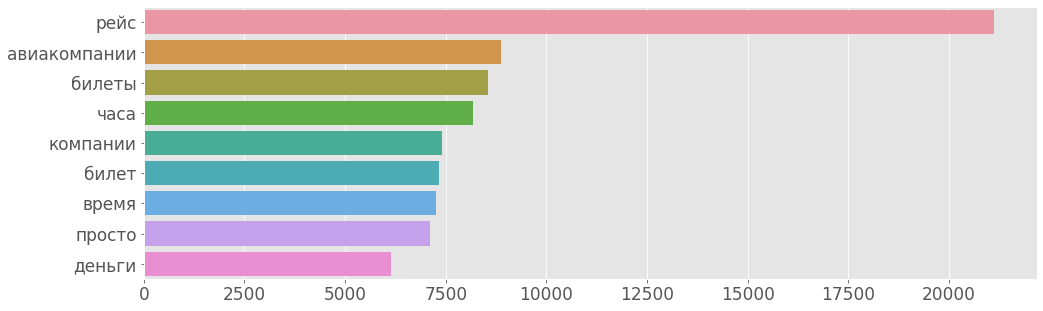

In [ ]:
corpus = create_corpus2(1)
plt.figure(figsize = (16,5))
plt.rcParams['font.size'] = 17

counter = Counter(corpus)
most = counter.most_common()
x = []
y = []
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
def get_top_tweet_bigrams(corpus, n = None):
    vec = CountVectorizer(ngram_range = (2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

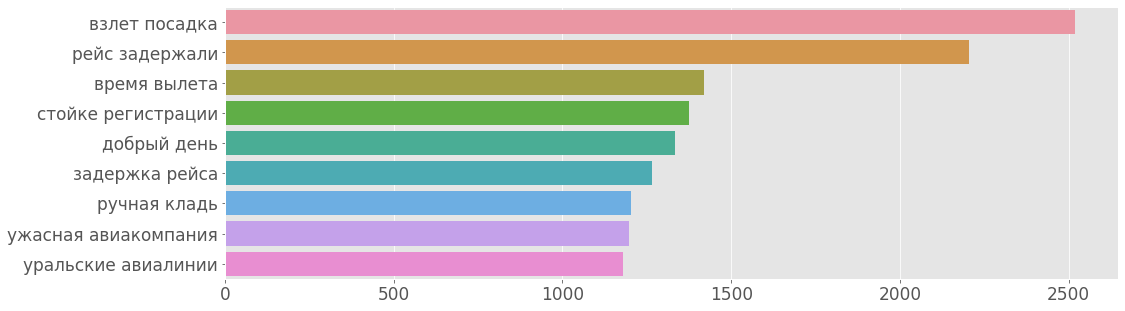

In [ ]:
plt.figure(figsize = (16,5))
plt.rcParams['font.size'] = 17
top_tweet_bigrams = get_top_tweet_bigrams(df['clean_text_forGR'])[:9]
x,y = map(list,zip(*top_tweet_bigrams))
sns.barplot(x = y, y = x)

In [ ]:
def create_corpus_df(tweet, target):
    corpus=[]
    
    for x in df[df['class']==target]['clean_text_forGR'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

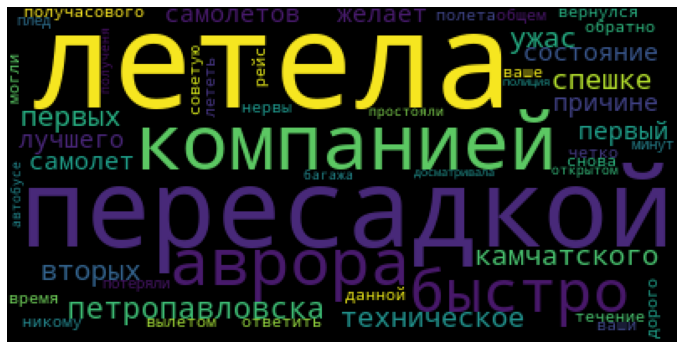

In [ ]:
corpus_new1=create_corpus_df(df,1)
len(corpus_new1)

plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

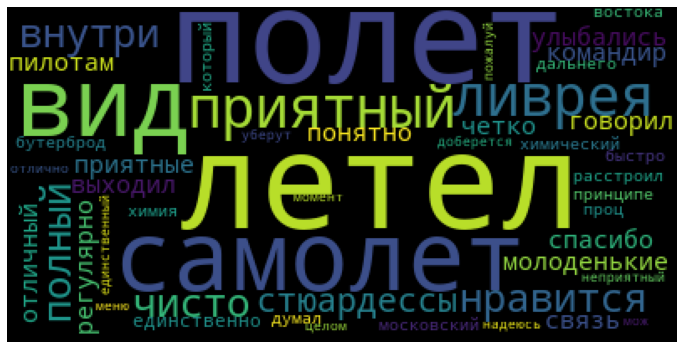

In [ ]:
corpus_new1=create_corpus_df(df,2)
len(corpus_new1)

plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

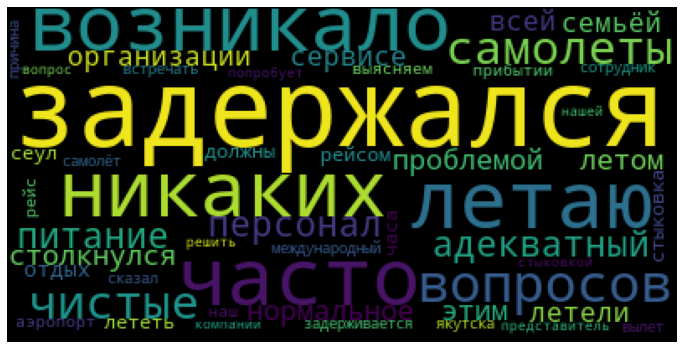

In [ ]:
corpus_new1=create_corpus_df(df,3)
len(corpus_new1)

plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["text"].tolist()
list_labels = df["class"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

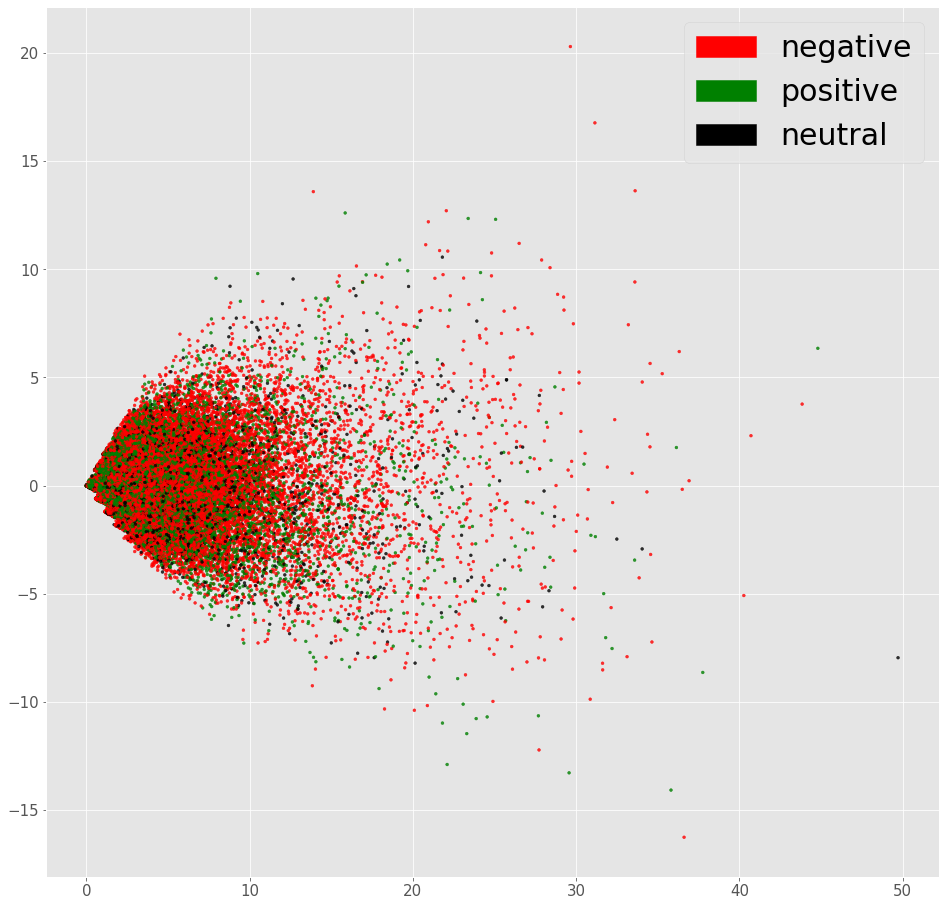

In [ ]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red','green','black']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            ng_patch = mpatches.Patch(color='red', label='negative')
            ps_patch = mpatches.Patch(color='green', label='positive')
            nu_patch = mpatches.Patch(color='black', label='neutral')
            plt.legend(handles=[ng_patch, ps_patch, nu_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

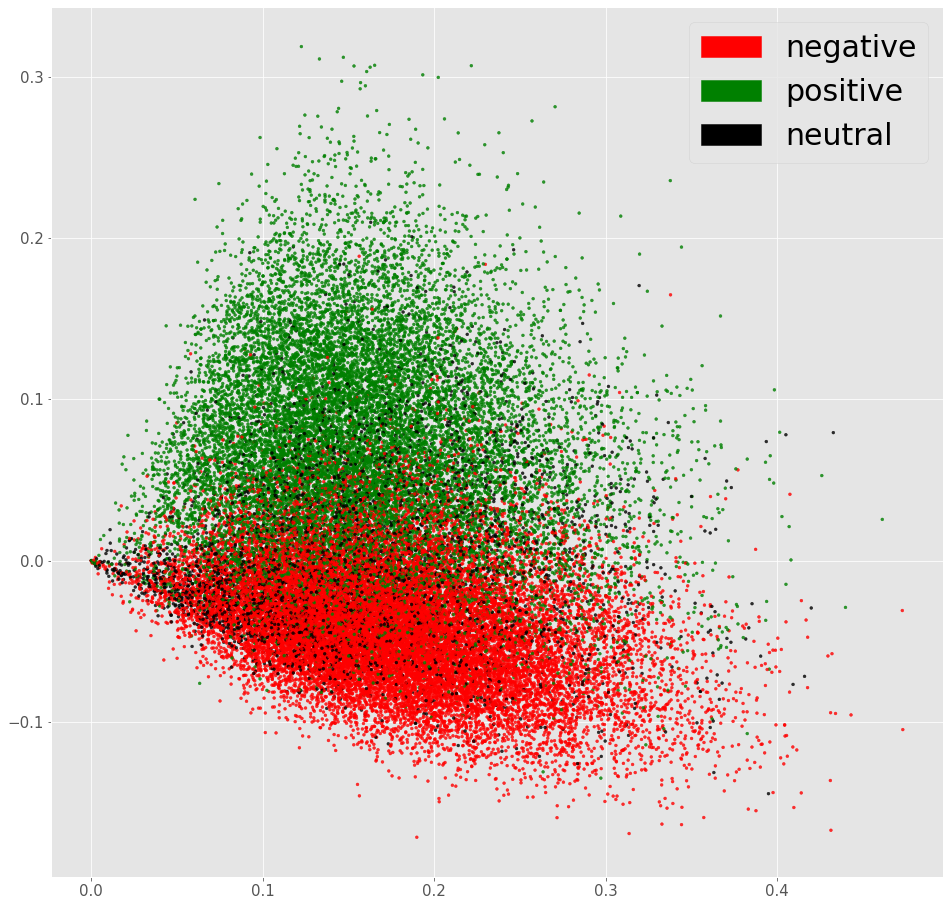

In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [ ]:
df.drop('clean_text_forGR', inplace=True, axis=1)

## Обработка текста

In [ ]:
df

,name,date,text,class
0,Аврора,03.05.2017,Летел Авророй Владивосток Хабаровск. А 319. Са...,positiv
1,Аврора,01.05.2017,Летела с 30 апреля по 1 мая с пересадкой через...,negativ
2,Аврора,24.04.2017,Летели по маршруту магадан-хабаровск и обратно...,positiv
3,Аврора,04.04.2017,"Рейс 5640 за 04.04.2017 \rПотеряли 1 плед, 20 ...",negativ
4,Аврора,19.03.2017,Никому не советую пользоваться услугами данной...,negativ
...,...,...,...,...
53220,Ямал,13.05.2021,Никакой лояльности по отношению к клиенту. Раз...,negativ
53221,Ямал,04.05.2021,Летела 29.04.21.из Москвы в Тюмень.Хочу вырази...,positiv
53222,Ямал,03.05.2021,"Не понятно за что деньги только дерут, ничего ...",negativ
53223,Ямал,30.04.2021,"Много летал и летаю, раз 100500)..но как сегод...",positiv


In [ ]:
n = 16
print(df['class'][n])
df['text'][n]

neutral


'Совершал два перелета Гонконг-Владивосток-Гонконг. На отрезке Гонконг-Владивосток стюардессы не улыбались, но я посмотрел бы на Вас, пролетев почти 5 часов, отдохнув 50 минут (слабо верится, что это отдых), полететь обратно. Но все свои обязанности исполняли относительно профессионально, заказанное питание на борту было. Рейс Владивосток-Гонконг послеобеденный, самолет полупустой, поэтому была возможность разложиться на 3-х сидениях. Стюардессы также сделали все профессионально (Старший БП была что и на рейсы во Владивосток) \rВ принципе летать очень даже можно, но если это реально дешево. За приличную сумму я бы наверное полетел, все таки с трудом на 4-ку.'

In [ ]:
df['class'] = df['class'].map({'negativ':0, 'positiv':1, 'neutral':2}) 

In [ ]:
n = df['class'].value_counts()[2]
n

5440

In [ ]:
n = df['class'].value_counts()[2]
class_1 = df[df['class'] == 0]
class_2 = df[df['class'] == 1]
class_3 = df[df['class'] == 2]

class_ng = class_1.sample(n)
class_ps = class_2.sample(n)
class_nt = class_3.sample(n)

aircs_1 = pd.concat([class_ng, class_ps], axis=0)
aircs = pd.concat([aircs_1, class_nt], axis=0)

In [ ]:
def text_cleaning(file_text):
    # удаление цифр
    file_text = re.sub(r'(\W)\1{2,}', r'\1', file_text) 
    file_text = re.sub(r'(\w)\1{2,}', r'\1\1', file_text)
    # удаление ссылок
    file_text = re.sub(r'(?P<url>https?://[^\s]+)', '', file_text) 
    # удаление типографических символов, знаков препинания
    file_text = re.sub(r"\@(\w+)", '', file_text) 
    file_text = re.sub(r"\#(\w+)", '', file_text) 
    file_text = re.sub(r"\$(\w+)", '', file_text) 
    file_text = file_text.replace("-",' ')
    tokens = word_tokenize(file_text)
    tokens = [i for i in tokens if (i not in string.punctuation)]

    # удаление стоп-слов
    stop_words = stopwords.words('russian')
    # дополнение списка стоп-слов
    stop_words.extend(['норд', 'совершенно','интеравиа','прям','берлин','магадан','бомбей', 'сих','пор', 'санкт','случайно',"петербург",'уральских','москва', 'что', 'очень', 'это', 'так', 'вот', 'быть', 'как', 'в','далее','которого','ку', 'моё', 'её','самом','ими','эта', 'при','нему','поэтому','моем','туда','те', 'ваш','стр','бц','всём','которому','иным', 'мни','щас','ну', 'ля','во''.','...','..','``','*'])
    tokens = [i.lower() for i in tokens if (i.lower() not in stop_words) or i.lower() == 'не' or i.lower() == 'нет']

    # удаление цифр
    remove_digits = str.maketrans('', '', digits)
    tokens = [i.translate(remove_digits) for i in tokens]
    
    # стемминг - выделение основы слова
    stemmer = SnowballStemmer("russian") 
    tokens = [stemmer.stem(i) for i in tokens]
    
    tokens = [i for i in tokens if len(i)>2]

    return ' '.join(tokens)

In [ ]:
%%time
aircs['clean_text'] = aircs['text'].apply(text_cleaning) # обработка текста
aircs.head()

CPU times: user 1min 28s, sys: 904 ms, total: 1min 29s
Wall time: 1min 30s


In [ ]:
X = aircs['clean_text'].values
y = aircs['class'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train, y_test = train_test_split(X, y,  test_size = 0.2)
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(13056,)
(3264,)
(13056,)
(3264,)


In [ ]:
#cv = CountVectorizer(min_df = 0.005)#, max_df = 0.75)
cv = TfidfVectorizer(min_df = 0.005)
cv.fit(X_train1)

X_train = cv.transform(X_train1)
X_test = cv.transform(X_test1)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler(with_mean=False)

# scaler = sc.fit(X_train2)
# X_train = scaler.transform(X_train2)
# X_test = scaler.transform(X_test2)

## Модели

In [ ]:
import re
import nltk

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from string import punctuation, digits
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
import time
from sklearn import metrics

In [ ]:
def models(clfs, feature_train, labels_train, feature_test, labels_test):
    acc = []
    tr_tim = []
    pr_tim = []
    run_tim = []
    precis = []
    rec = []
    ff = []
    me =[]
    
    for k,v in clfs.items():
        start_time = time.time()
        v.fit(feature_train, labels_train)
        tr_tim.append(time.time() - start_time)
        start_time2 = time.time()
        y_pred = v.predict(feature_test)
        pr_tim.append(time.time() - start_time2)
        run_tim.append(time.time() - start_time)
        ww1 = accuracy_score(labels_test, y_pred)
        acc.append(ww1)
        p = precision_score(labels_test, y_pred, average = 'micro')
        precis.append(p)
        r = recall_score(labels_test, y_pred, average = 'micro')
        rec.append(r)
        f = f1_score(labels_test, y_pred, average = 'micro')
        ff.append(f)
        m = mean_absolute_error(labels_test, y_pred, multioutput = 'uniform_average')
        me.append(m)
        
        print(v)
        print('Accuracy',ww1)
        print(metrics.classification_report(labels_test, y_pred))
        print(metrics.confusion_matrix(labels_test, y_pred))
        
    return acc, tr_tim, pr_tim, run_tim, precis,rec, m, ff 

In [ ]:
bnb = BernoulliNB()
lrc = LogisticRegression(multi_class='multinomial', solver='lbfgs')
svc = SVC(kernel='rbf', gamma=1, C=1)
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 12)
rfc = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors = 51)
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter = 100, activation = 'tanh', solver = 'sgd')
grd = GradientBoostingClassifier(n_estimators=300, learning_rate = 0.05, max_features=25, max_depth = 25)
cbc = CatBoostClassifier(random_state = 42)

In [ ]:
clfs = {'Naive Bayes': bnb, 'Logistic regression': lrc}

In [ ]:
clfs = {'Naive Bayes': bnb, 'Logistic regression': lrc,'SVM': svc, 'k Nearest Neighbor': knn,
        'Decision tree': dtc, 'Random forest': rfc, 'Gradient boosting': grd,
        'CatBoostClassifier': cbc, 'Multilayer Perceptron Classifier':mlp}

In [ ]:
r1, tr_tim, pr_tim, run_tim, precis, rec, mean_er, ff = models(clfs, X_train, y_train, X_test, y_test) # !!!!!!!!!! итоговая

BernoulliNB()
Accuracy 0.7208946078431373
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1076
           1       0.78      0.82      0.80      1098
           2       0.61      0.61      0.61      1090

    accuracy                           0.72      3264
   macro avg       0.72      0.72      0.72      3264
weighted avg       0.72      0.72      0.72      3264

[[791  25 260]
 [ 42 897 159]
 [201 224 665]]
LogisticRegression(multi_class='multinomial')
Accuracy 0.7549019607843137
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1076
           1       0.82      0.83      0.83      1098
           2       0.66      0.64      0.65      1090

    accuracy                           0.75      3264
   macro avg       0.75      0.75      0.75      3264
weighted avg       0.75      0.75      0.75      3264

[[854  18 204]
 [ 28 908 162]
 [213 175 702]]
SVC(C=1, gamma=1)
Accuracy 0.7

In [ ]:
res_mod1 = pd.DataFrame(run_tim, index=list(clfs.keys()), columns=['Run time'])
res_mod1['Traing time'] = tr_tim
res_mod1['Test time'] = pr_tim
res_mod1['Accuracy'] = r1
#res_mod1['Precision'] = precis
#res_mod1['Recall'] = rec
#res_mod1['F1'] = ff

In [ ]:
res_mod1

,Run time,Traing time,Test time,Accuracy
Naive Bayes,0.028853,0.025451,0.003396,0.720895
Logistic regression,1.387129,1.385935,0.001191,0.754902
SVM,84.116604,68.091174,16.025424,0.761949
k Nearest Neighbor,2.590155,0.004291,2.585860,0.701900
Decision tree,2.075837,2.074070,0.001761,0.619485
Random forest,21.438542,21.292269,0.146271,0.726103
Gradient boosting,71.231857,69.852001,1.379851,0.747549
CatBoostClassifier,795.145539,795.085526,0.060007,0.762255
Multilayer Perceptron Classifier,100.655412,100.588343,0.067062,0.757047


RNN

In [ ]:
from sklearn.preprocessing import LabelEncoder
import torch

In [ ]:
encoder = LabelEncoder().fit(y_train)
y_train = torch.tensor(encoder.transform(y_train))
y_test = torch.tensor(encoder.transform(y_test))

In [ ]:
class Vocab:
  def __init__(self, data):
    tokens = set()
    self.max_seq_len = 0
    for sentence in data:
        sent = sentence.split()
        
        self.max_seq_len = max(self.max_seq_len, (len(sent) + 2)) # <PAD>, <UNK>
        tokens.update(sent)
 
    self.idx_to_token = {idx + 2: token for idx, token in enumerate(tokens)}
    self.token_to_idx = {token: idx for idx, token in self.idx_to_token.items()}
 
    self.idx_to_token[0] = '<pad>'
    self.token_to_idx['<pad>'] = 0
 
    self.idx_to_token[1] = '<unk>'
    self.token_to_idx['<unk>'] = 1
 
    self.vocab_len = len(self.token_to_idx)

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class TextDataset(Dataset):
  def __init__(self, X, y, vocab):
    self.X = X
    self.y = y
    self.vocab = vocab
 
  def vectorize(self, sentence):
 
    sent = sentence.split()
    sent_t = []
    for word in sent:
        sent_t.append(self.vocab.token_to_idx.get(word,
                                                  self.vocab.token_to_idx['<unk>']))
 
    for _ in range(self.vocab.max_seq_len - len(sent)):
        sent_t.append(self.vocab.token_to_idx['<pad>'])
        
    return torch.tensor(sent_t)
  
  def __len__(self):
    return len(self.X)
 
  def __getitem__(self, idx):
    return self.vectorize(self.X[idx])[:self.vocab.max_seq_len], self.y[idx]

In [ ]:
vocab = Vocab(X)
vocab.vocab_len, vocab.max_seq_len

(39422, 677)

In [ ]:
ds_train = TextDataset(X_train1, y_train, vocab)
ds_test = TextDataset(X_test1, y_test, vocab)

In [ ]:
from torch.utils.data import DataLoader
from matplotlib import pyplot

In [ ]:
batch_size = 64
train_loader = DataLoader(ds_train, batch_size = batch_size)
test_loader = DataLoader(ds_test,  batch_size = batch_size)

In [ ]:
def train_model(model, loader, loss, optimizer, num_epochs): 
 
    loss_log = []
 
    for epoch in range(num_epochs):
 
        loss_accum = 0
 
        for i_step, (X, y) in enumerate(loader):
            
            pred = model.forward(X)
            batch_loss = loss(pred, y)
 
            loss_accum += batch_loss
 
            batch_loss.backward()
            
            optimizer.step()
            optimizer.zero_grad()
            
        loss_epoch = loss_accum / i_step
        loss_epoch = float(loss_epoch)
        loss_log.append(loss_epoch)
             
        print(f'epoch: {epoch}; ' 
            + f'loss: {round(loss_epoch, 3)}; ')
 
    return loss_log

In [ ]:
class RNN(nn.Module):
    def __init__(self, volume = vocab.vocab_len):
        super().__init__()
        emb = 16
        hid = 64

        self.embedding = nn.Embedding(volume, emb)

        self.rnn = nn.RNN(emb, hid,
                          batch_first = True)  
        
        self.layer = nn.Sequential(
            
            nn.AvgPool1d(hid),
            nn.Dropout(0.4),
            nn.Flatten(),

            nn.Linear(677, 3)
            )
 
    def forward(self, input):
      input = self.embedding(input)
      input, hidden = self.rnn(input)
      input = input.unsqueeze(1)
      input = self.layer(input[:,-1])
 
      return input

In [ ]:
RNNmodel = RNN()
 
parameters = RNNmodel.parameters()
 
num_epochs = 25
 
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(parameters, lr = 0.01) 
loss_log = train_model(RNNmodel,
                       train_loader,
                       loss,
                       optimizer,
                       num_epochs)

epoch: 0; loss: 1.138; 
epoch: 1; loss: 1.075; 
epoch: 2; loss: 1.064; 
epoch: 3; loss: 1.022; 
epoch: 4; loss: 0.993; 
epoch: 5; loss: 0.899; 
epoch: 6; loss: 0.744; 
epoch: 7; loss: 0.708; 
epoch: 8; loss: 0.615; 
epoch: 9; loss: 0.533; 
epoch: 10; loss: 0.472; 
epoch: 11; loss: 0.425; 
epoch: 12; loss: 0.387; 
epoch: 13; loss: 0.364; 
epoch: 14; loss: 0.337; 
epoch: 15; loss: 0.324; 
epoch: 16; loss: 0.313; 
epoch: 17; loss: 0.352; 
epoch: 18; loss: 0.318; 
epoch: 19; loss: 0.279; 
epoch: 20; loss: 0.263; 
epoch: 21; loss: 0.25; 
epoch: 22; loss: 0.247; 
epoch: 23; loss: 0.246; 
epoch: 24; loss: 0.246; 


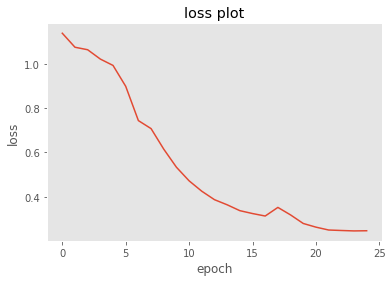

In [ ]:
def loss_plot(loss_log):
  num_epochs = len(loss_log)
  ax = list(range(num_epochs))
  pyplot.plot(loss_log)
  pyplot.title('loss plot')
  pyplot.xlabel('epoch')
  pyplot.ylabel('loss')
  pyplot.grid()
loss_plot(loss_log)

In [ ]:
def summary(model, loader):
 
  y_pred = []
  y_true = []
 
  for X, y in loader:
    y_pred.append(torch.argmax(model.forward(X), axis = 1))
    y_true.append(y)
 
  with torch.no_grad():
    y_true = torch.cat(y_true)
    y_pred = torch.cat(y_pred)
  print(classification_report(y_true, y_pred))
  return accuracy_score(y_true, y_pred)

In [ ]:
ac_rnn = summary(RNNmodel, test_loader)
print(ac_rnn)

0.6629901960784313
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1054
           1       0.76      0.75      0.76      1074
           2       0.53      0.58      0.55      1136

    accuracy                           0.66      3264
   macro avg       0.67      0.66      0.67      3264
weighted avg       0.67      0.66      0.67      3264



----------------------

In [ ]:
res_mod1

,Run time,Traing time,Test time,Accuracy
Naive Bayes,0.028853,0.025451,0.003396,0.720895
Logistic regression,1.387129,1.385935,0.001191,0.754902
SVM,84.116604,68.091174,16.025424,0.761949
k Nearest Neighbor,2.590155,0.004291,2.585860,0.701900
Decision tree,2.075837,2.074070,0.001761,0.619485
Random forest,21.438542,21.292269,0.146271,0.726103
Gradient boosting,71.231857,69.852001,1.379851,0.747549
CatBoostClassifier,795.145539,795.085526,0.060007,0.762255
Multilayer Perceptron Classifier,100.655412,100.588343,0.067062,0.757047


In [ ]:
k1n1 = 912.53916
k2n1 = 9.71612
k4n1 = 0.66299
df_r = pd.DataFrame([[k1n1+k2n1, k1n1, k2n1, k4n1]], columns=['Run time','Traing time','Test time','Accuracy'], index=['Neural Network RNN'])
res_mod1 = res_mod1.append(df_r)

In [ ]:
res_mod1

,Run time,Traing time,Test time,Accuracy
Naive Bayes,0.028853,0.025451,0.003396,0.720895
Logistic regression,1.387129,1.385935,0.001191,0.754902
SVM,84.116604,68.091174,16.025424,0.761949
k Nearest Neighbor,2.590155,0.004291,2.585860,0.701900
Decision tree,2.075837,2.074070,0.001761,0.619485
Random forest,21.438542,21.292269,0.146271,0.726103
Gradient boosting,71.231857,69.852001,1.379851,0.747549
CatBoostClassifier,795.145539,795.085526,0.060007,0.762255
Multilayer Perceptron Classifier,100.655412,100.588343,0.067062,0.757047
Neural Network RNN,922.255280,912.539160,9.716120,0.662990


----------------------

In [ ]:
pip install dostoevsky

     |████████████████████████████████| 68 kB 2.1 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3143638 sha256=78a992b2d7d0d7ff4b385ebc6bafda6cd6f227a2562c93125591601635e02d6c
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import dostoevsky
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [ ]:
FastTextSocialNetworkModel.MODEL_PATH = 'fasttext-social-network-model.bin'

In [ ]:
model = FastTextSocialNetworkModel(RegexTokenizer())

In [ ]:
model = FastTextSocialNetworkModel(RegexTokenizer())

messages = X
start_time = time.time()
results = model.predict(messages, k = 2)
t_do = time.time() - start_time

for y, sentiment in zip(y, results):
    print(y, '->', sentiment)

Выходные данные были обрезаны до нескольких последних строк (5000).
2 -> {'neutral': 0.44553956389427185, 'skip': 0.21207880973815918}
2 -> {'neutral': 0.348655104637146, 'negative': 0.1824355274438858}
2 -> {'neutral': 0.4688006341457367, 'skip': 0.1968362182378769}
2 -> {'neutral': 0.40734341740608215, 'skip': 0.2689514458179474}
2 -> {'neutral': 0.9099169969558716, 'positive': 0.07370626926422119}
2 -> {'neutral': 0.7773098945617676, 'negative': 0.23935934901237488}
2 -> {'neutral': 0.348655104637146, 'skip': 0.26285186409950256}
2 -> {'neutral': 0.7248802781105042, 'negative': 0.18714269995689392}
2 -> {'neutral': 0.5156299471855164, 'negative': 0.3007555902004242}
2 -> {'neutral': 0.348655104637146, 'skip': 0.2568419873714447}
2 -> {'neutral': 0.41490885615348816, 'negative': 0.16452647745609283}
2 -> {'positive': 0.38492217659950256, 'negative': 0.22816647589206696}
2 -> {'neutral': 0.7057950496673584, 'skip': 0.11921291798353195}
2 -> {'positive': 0.3775506913661957, 'neutral': 

In [ ]:
import itertools

In [ ]:
y_pred_d = [dict(itertools.islice(i.items(), 1)) for i in results]

In [ ]:
y_pred_d2 = [list(i.keys())[0] for i in y_pred_d]

In [ ]:
y_pred_d3 = []
for i in y_pred_d2:
  if i == 'negative':
    y_pred_d3.append(0)
  elif i == 'positive':
    y_pred_d3.append(1)
  else: y_pred_d3.append(2)

In [ ]:
X = aircs['clean_text'].values
y = aircs['class'].values

In [ ]:
t = 0
k = 0
for i in range(len(y)):
  if y[i] == y_pred_d3[i]:
    t += 1
    k += 1
  else: k+=1
ac_d = t/k
print('Accuracy: ', ac_d)

Accuracy:  0.38560049019607845


In [ ]:
print('Testing time: ', t_do)

Testing time:  14.42277479171753


In [ ]:
k1n11 = 14.42277479
k2n11 = 14.42277479
k4n11 = 0.38560049
df_r = pd.DataFrame([[k1n11, 'NaN', k2n11, k4n11]], columns=['Run time','Traing time','Test time','Accuracy'], index=['Dostoevsky'])
res_mod1 = res_mod1.append(df_r)

In [ ]:
res_mod1

,Run time,Traing time,Test time,Accuracy
Naive Bayes,0.028853,0.025451,0.003396,0.720895
Logistic regression,1.387129,1.385935,0.001191,0.754902
SVM,84.116604,68.091174,16.025424,0.761949
k Nearest Neighbor,2.590155,0.004291,2.585860,0.701900
Decision tree,2.075837,2.07407,0.001761,0.619485
Random forest,21.438542,21.292269,0.146271,0.726103
Gradient boosting,71.231857,69.852001,1.379851,0.747549
CatBoostClassifier,795.145539,795.085526,0.060007,0.762255
Multilayer Perceptron Classifier,100.655412,100.588343,0.067062,0.757047
Neural Network RNN,922.255280,912.53916,9.716120,0.662990


## Результаты

In [ ]:
res_mod1['Accuracy']

Naive Bayes                         0.720895
Logistic regression                 0.754902
SVM                                 0.761949
k Nearest Neighbor                  0.701900
Decision tree                       0.619485
Random forest                       0.726103
Gradient boosting                   0.747549
CatBoostClassifier                  0.762255
Multilayer Perceptron Classifier    0.757047
Neural Network RNN                  0.662990
Dostoevsky                          0.385600
Name: Accuracy, dtype: float64

Text(0.5, 0, 'Classifier')

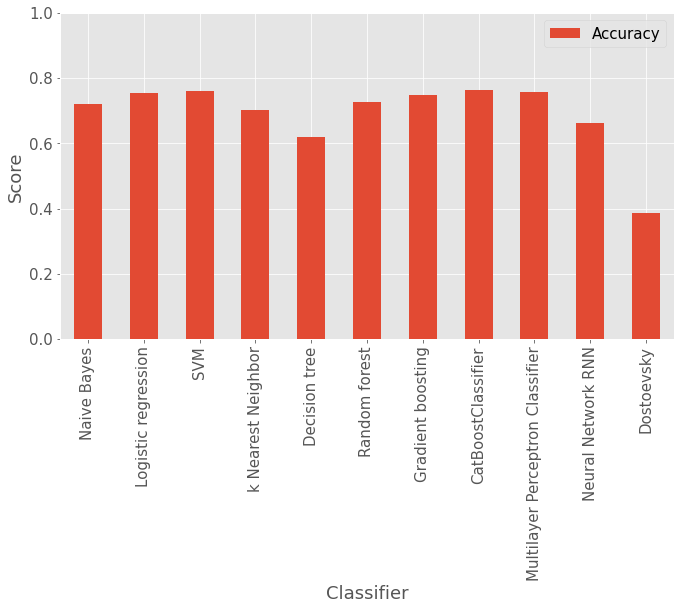

In [ ]:
res = res_mod1.drop(['Run time','Test time', 'Traing time'], axis = 1)
#res = res.drop(['CatBoostClassifier', 'Gradient boosting'], axis = 0)
plt.rcParams['font.size'] = 15
res.plot(kind='bar', ylim=(0,1.0), figsize=(11,6), align='center')
plt.xticks(np.arange(len(res)), res.index)
plt.ylabel('Score')
plt.xlabel('Classifier')

In [ ]:
res

,Accuracy
Naive Bayes,0.720895
Logistic regression,0.754902
SVM,0.761949
k Nearest Neighbor,0.701900
Decision tree,0.619485
Random forest,0.726103
Gradient boosting,0.747549
CatBoostClassifier,0.762255
Multilayer Perceptron Classifier,0.757047
Neural Network RNN,0.662990


Text(0.5, 0, 'Classifier')

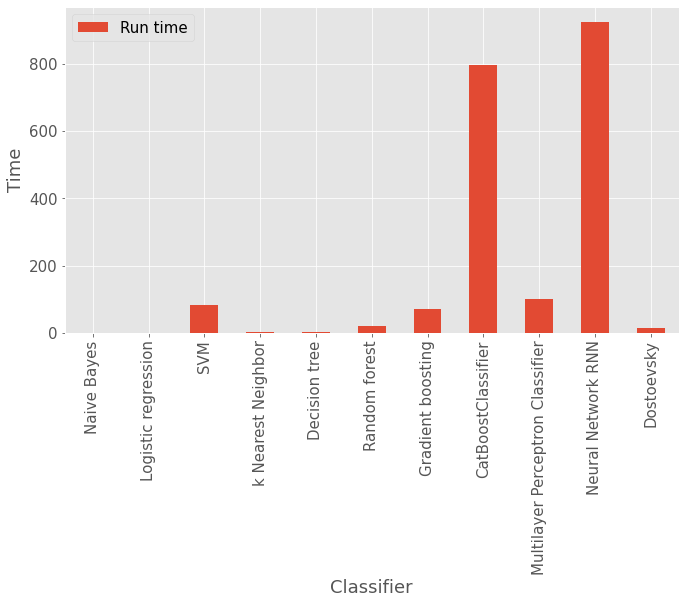

In [ ]:
res2 = res_mod1.drop(['Accuracy','Test time', 'Traing time'], axis = 1)
#res = res.drop(['CatBoostClassifier', 'Gradient boosting'], axis = 0)
plt.rcParams['font.size'] = 15
res2.plot(kind='bar', figsize=(11,6), align='center')
plt.xticks(np.arange(len(res2)), res2.index)
plt.ylabel('Time')
plt.xlabel('Classifier')

In [ ]:
res2

,Run time
Naive Bayes,0.028853
Logistic regression,1.387129
SVM,84.116604
k Nearest Neighbor,2.590155
Decision tree,2.075837
Random forest,21.438542
Gradient boosting,71.231857
CatBoostClassifier,795.145539
Multilayer Perceptron Classifier,100.655412
Neural Network RNN,922.255280


## Проверка наилучшего результата

In [ ]:
%%time
cbc.fit(X_train, y_train)

Learning rate set to 0.090205
0:	learn: 1.0728904	total: 1.56s	remaining: 26m 4s
1:	learn: 1.0504152	total: 2.37s	remaining: 19m 40s
2:	learn: 1.0286562	total: 3.16s	remaining: 17m 28s
3:	learn: 1.0099824	total: 3.93s	remaining: 16m 19s
4:	learn: 0.9952492	total: 4.71s	remaining: 15m 37s
5:	learn: 0.9814678	total: 5.5s	remaining: 15m 11s
6:	learn: 0.9677976	total: 6.29s	remaining: 14m 51s
7:	learn: 0.9550681	total: 7.08s	remaining: 14m 38s
8:	learn: 0.9430759	total: 7.87s	remaining: 14m 26s
9:	learn: 0.9341664	total: 8.69s	remaining: 14m 20s
10:	learn: 0.9252611	total: 9.51s	remaining: 14m 15s
11:	learn: 0.9156431	total: 10.3s	remaining: 14m 8s
12:	learn: 0.9073190	total: 11.1s	remaining: 14m 2s
13:	learn: 0.9002229	total: 12.3s	remaining: 14m 24s
14:	learn: 0.8942957	total: 13.5s	remaining: 14m 47s
15:	learn: 0.8862571	total: 14.7s	remaining: 15m 1s
16:	learn: 0.8797476	total: 15.9s	remaining: 15m 18s
17:	learn: 0.8740249	total: 17.9s	remaining: 16m 18s
18:	learn: 0.8678717	total: 19.

In [ ]:
%%time
y_pred = cbc.predict(X_test)

CPU times: user 118 ms, sys: 13 ms, total: 131 ms
Wall time: 77.1 ms


In [ ]:
accuracy_score(y_test, y_pred)

0.7622549019607843

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1076
           1       0.83      0.84      0.83      1098
           2       0.67      0.66      0.66      1090

    accuracy                           0.76      3264
   macro avg       0.76      0.76      0.76      3264
weighted avg       0.76      0.76      0.76      3264



In [ ]:
def check():
    otzv = input('Введите текст отзыва:\n')
    oo = text_cleaning(otzv)
    ttest = cv.transform([oo])

    print('\nОценка отзыва:')
    qq = int(cbc.predict(ttest)[0])
    print(qq)
    oq = ['Отрицательный', 'Положительный', 'Нейтральный']
    print(oq[qq])

#### Верные предсказания

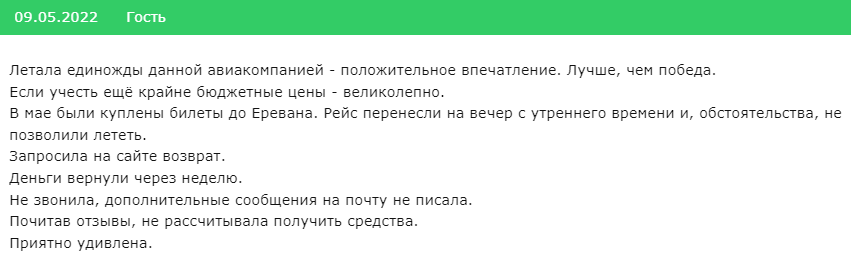

In [ ]:
check()

Введите текст отзыва:
Летала единожды данной авиакомпанией - положительное впечатление. Лучше, чем победа. Если учесть ещё крайне бюджетные цены - великолепно. В мае были куплены билеты до Еревана. Рейс перенесли на вечер с утреннего времени и, обстоятельства, не позволили лететь. Запросила на сайте возврат. Деньги вернули через неделю. Не звонила, дополнительные сообщения на почту не писала. Почитав отзывы, не рассчитывала получить средства. Приятно удивлена.

Оценка отзыва:
1
Положительный


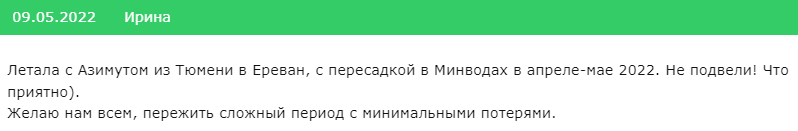

In [ ]:
check()

Введите текст отзыва:
Летала с Азимутом из Тюмени в Ереван, с пересадкой в Минводах в апреле-мае 2022. Не подвели! Что приятно). Желаю нам всем, пережить сложный период с минимальными потерями.

Оценка отзыва:
1
Положительный


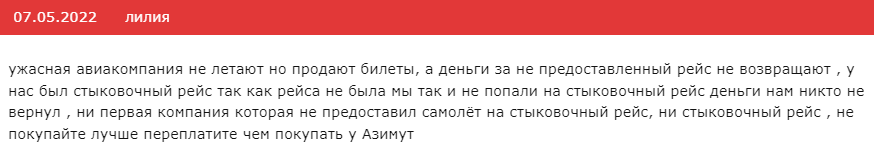

In [ ]:
check()

Введите текст отзыва:
ужасная авиакомпания не летают но продают билеты, а деньги за не предоставленный рейс не возвращают , у нас был стыковочный рейс так как рейса не была мы так и не попали на стыковочный рейс деньги нам никто не вернул , ни первая компания которая не предоставил самолёт на стыковочный рейс, ни стыковочный рейс , не покупайте лучше переплатите чем покупать у Азимут

Оценка отзыва:
0
Отрицательный


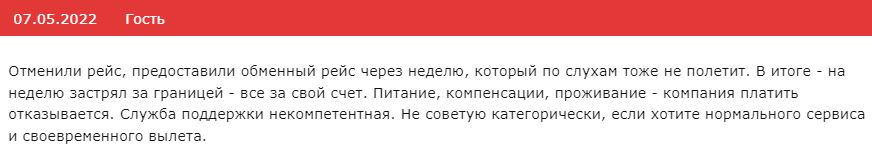

In [ ]:
check()

Введите текст отзыва:
Отменили рейс, предоставили обменный рейс через неделю, который по слухам тоже не полетит. В итоге - на неделю застрял за границей - все за свой счет. Питание, компенсации, проживание - компания платить отказывается. Служба поддержки некомпетентная. Не советую категорически, если хотите нормального сервиса и своевременного вылета.

Оценка отзыва:
0
Отрицательный


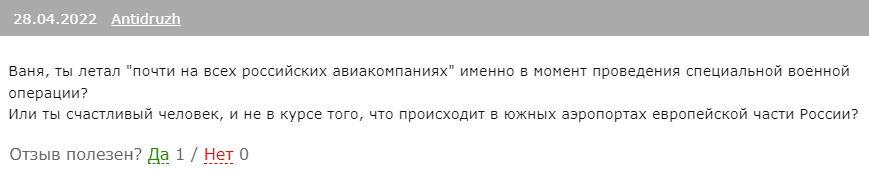

In [ ]:
check()

Введите текст отзыва:
Ваня, ты летал "почти на всех российских авиакомпаниях" именно в момент проведения специальной военной операции? Или ты счастливый человек, и не в курсе того, что происходит в южных аэропортах европейской части России?

Оценка отзыва:
2
Нейтральный


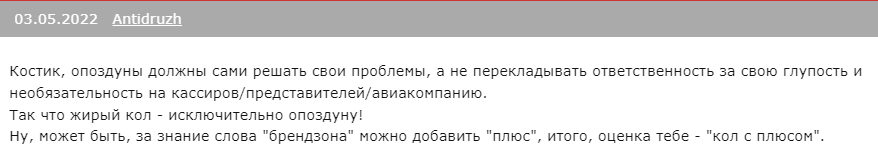

In [ ]:
check()

Введите текст отзыва:
Костик, опоздуны должны сами решать свои проблемы, а не перекладывать ответственность за свою глупость и необязательность на кассиров/представителей/авиакомпанию. Так что жирый кол - исключительно опоздуну! Ну, может быть, за знание слова "брендзона" можно добавить "плюс", итого, оценка тебе - "кол с плюсом".

Оценка отзыва:
2
Нейтральный


#### Ошибочные предсказания

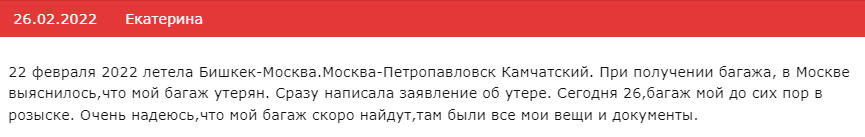

In [ ]:
check()

Введите текст отзыва:
22 февраля 2022 летела Бишкек-Москва.Москва-Петропавловск Камчатский. При получении багажа, в Москве выяснилось,что мой багаж утерян. Сразу написала заявление об утере. Сегодня 26,багаж мой до сих пор в розыске. Очень надеюсь,что мой багаж скоро найдут,там были все мои вещи и документы.

Оценка отзыва:
2
Нейтральный


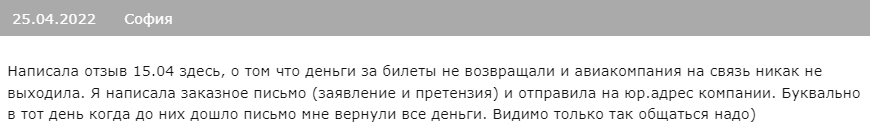

In [ ]:
check()

Введите текст отзыва:
Написала отзыв 15.04 здесь, о том что деньги за билеты не возвращали и авиакомпания на связь никак не выходила. Я написала заказное письмо (заявление и претензия) и отправила на юр.адрес компании. Буквально в тот день когда до них дошло письмо мне вернули все деньги. Видимо только так общаться надо)

Оценка отзыва:
0
Отрицательный


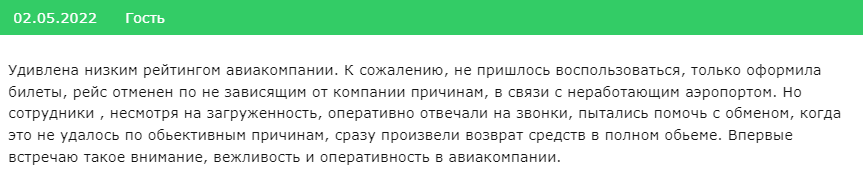

In [ ]:
check()

Введите текст отзыва:
Удивлена низким рейтингом авиакомпании. К сожалению, не пришлось воспользоваться, только оформила билеты, рейс отменен по не зависящим от компании причинам, в связи с неработающим аэропортом. Но сотрудники , несмотря на загруженность, оперативно отвечали на звонки, пытались помочь с обменом, когда это не удалось по обьективным причинам, сразу произвели возврат средств в полном обьеме. Впервые встречаю такое внимание, вежливость и оперативность в авиакомпании.

Оценка отзыва:
0
Отрицательный


## Telegram-бот для авиакомпании

In [ ]:
%%time
cbc.fit(X_train, y_train)

Learning rate set to 0.090205
0:	learn: 1.0727105	total: 4.31s	remaining: 1h 11m 45s
1:	learn: 1.0519138	total: 6.66s	remaining: 55m 22s
2:	learn: 1.0326682	total: 8.75s	remaining: 48m 26s
3:	learn: 1.0155127	total: 11.4s	remaining: 47m 17s
4:	learn: 1.0002619	total: 13.5s	remaining: 44m 43s
5:	learn: 0.9860740	total: 16.1s	remaining: 44m 20s
6:	learn: 0.9714823	total: 18.2s	remaining: 43m 5s
7:	learn: 0.9592774	total: 19.9s	remaining: 41m 6s
8:	learn: 0.9485103	total: 21.3s	remaining: 39m 7s
9:	learn: 0.9376163	total: 23s	remaining: 37m 53s
10:	learn: 0.9278831	total: 24.7s	remaining: 36m 59s
11:	learn: 0.9189663	total: 26.2s	remaining: 35m 55s
12:	learn: 0.9107861	total: 27.5s	remaining: 34m 48s
13:	learn: 0.9046565	total: 29.1s	remaining: 34m 7s
14:	learn: 0.8965103	total: 30.8s	remaining: 33m 42s
15:	learn: 0.8891213	total: 32.1s	remaining: 32m 54s
16:	learn: 0.8829596	total: 33.5s	remaining: 32m 18s
17:	learn: 0.8774962	total: 35.1s	remaining: 31m 55s
18:	learn: 0.8721183	total: 3

In [ ]:
%%time
y_pred = cbc.predict(X_test)

CPU times: user 119 ms, sys: 17 ms, total: 136 ms
Wall time: 80.9 ms


In [ ]:

accuracy_score(y_test, y_pred)

0.7552083333333334

In [ ]:
tweet_len=df['text'].str.split().map(lambda x: len(x))
ll = int(tweet_len.mean()*0.50)

def check_inTG(otzv):
  oo = text_cleaning(otzv)
  #print(len(oo.split(' ')))
  ee = oo.split(' ')
  if len(ee)>=ll:
    ttest = cv.transform([oo])
    qq = int(cbc.predict(ttest)[0])
  else: 
    qq = model.predict([otzv], k = 1)
    qq = list(qq[0].keys())[0]
    if qq == 'negative':
      qq = 0
    elif qq == 'positive':
      qq = 1
    else: qq = 2
  return qq

In [ ]:
a = check_inTG('хорошая авиакомпания')
a

1

In [ ]:
! pip install pyTelegramBotApi

     |████████████████████████████████| 157 kB 9.1 MB/s 
  Created wheel for pyTelegramBotApi: filename=pyTelegramBotAPI-4.5.1-py3-none-any.whl size=138116 sha256=1166649d1ec08929e9dff7bb60e04a701c5d527ebf10af8f4aeaf2299f9d9a40
  Stored in directory: /root/.cache/pip/wheels/9a/90/69/89e4e68c819633d933753827fd4f3a22987e162b7404b092b5
Successfully built pyTelegramBotApi


In [ ]:
! pip install config

In [ ]:
import telebot
from telebot import types # для указание типов
import config

review = 'неотзыв'

bot = telebot.TeleBot("5351365828:AAEgjZQcmza1xv3KUfSCf39it7f-FrcIsio")

@bot.message_handler(commands=['start'])
def start(message):
    markup = types.ReplyKeyboardMarkup(resize_keyboard=True)
    btn2 = types.KeyboardButton("🌐Перейти на сайт авиакомпании")
    btn1 = types.KeyboardButton("❔Что я могу")
    markup.add(btn1, btn2)
    bot.send_message(message.chat.id, text="Здравствуйте, {0.first_name}! Я бот авиакомпании Уральские авиалинии (ВКР)".format(message.from_user), reply_markup=markup)

@bot.message_handler(content_types=['text'])
def func(message):
    review = 'неотзыв'
    if(message.text == "🌐Перейти на сайт авиакомпании"):
        markup = types.InlineKeyboardMarkup()
        button1 = types.InlineKeyboardButton("Уральские авиалинии", url='https://www.uralairlines.ru/')
        markup.add(button1)
        bot.send_message(message.chat.id, "Нажмите на кнопку и перейдите на сайт".format(message.from_user), reply_markup=markup)
    
    elif (message.text == "❔Что я могу"):
        markup = types.ReplyKeyboardMarkup(resize_keyboard=True)
        btn1 = types.KeyboardButton("О нас")
        btn2 = types.KeyboardButton("Расписание рейсов")
        btn3 = types.KeyboardButton("Оставить отзыв о полёте")
        back = types.KeyboardButton("Вернуться в главное меню")
        markup.add(btn1, btn2, btn3, back)
        bot.send_message(message.chat.id, text="Выберете интересующую Вас опцию", reply_markup=markup)
    
    elif (message.text == "Расписание рейсов"):
        markup = types.InlineKeyboardMarkup()
        button1 = types.InlineKeyboardButton("Онлайн-табло", url='https://www.uralairlines.ru/online_board/')
        markup.add(button1)
        bot.send_message(message.chat.id, "Нажмите на кнопку и перейдите на сайт ".format(message.from_user), reply_markup=markup)
    
    elif(message.text == "О нас"):
        bot.send_message(message.chat.id, "URAL AIRLINES\n«Уральские авиалинии» входят в ТОП крупнейших российских авиакомпаний\nГеография полетов насчитывает уже более 200 направлений и это ― не предел для нас!\nЦентры авиакомпании расположены в аэропортах:\n✈️Кольцово (Екатеринбург)\n✈️Домодедово (Москва)\n✈️Курумоч (Самара)\n✈️Баландино (Челябинск)\n✈️Жуковский (Москва)".format(message.from_user))

    elif message.text == "Оставить отзыв о полёте":
        bot.send_message(message.chat.id, text="Поделитесь вашим отзывов о наших услугах!")
        review = 'отзыв'        

    elif (message.text == "Вернуться в главное меню"):
        markup = types.ReplyKeyboardMarkup(resize_keyboard=True)
        button1 = types.KeyboardButton("❔Что я могу")
        button2 = types.KeyboardButton("🌐Перейти на сайт авиакомпании")
        markup.add(button1, button2) 
        bot.send_message(message.chat.id, text="Вы вернулись в главное меню", reply_markup=markup)

    else:
        if (check_inTG(message.text) == 0):
          bot.send_message(message.chat.id, "Сожалеем, что данная ситуация испортила впечатление о пользовании услугами нашей авиакомпании. Пожалуйста, напишите нам на support@vkrairlines.ru - мы обязательно разберемся в ситуации".format(message.from_user))        
          markup_op = types.InlineKeyboardMarkup()
          button_op = types.InlineKeyboardButton("Оператор", url='https://t.me/irinalex_ch')
          markup_op.add(button_op)
          bot.send_message(message.chat.id, "При желании Вы можете обратиться к нашему оператору, который поможет разобраться в ситуации".format(message.from_user), reply_markup = markup_op)        
          review = 'неотзыв'

        elif (check_inTG(message.text) == 1):
          bot.send_message(message.chat.id, "Большое спасибо за отзыв, {0.first_name}! Мы очень рады, что вы оценили услуги нашей авиакомпании. Мы обязательно будем усердно работать, чтобы сделать ваши полёты незабываемыми! Желаем вам ещё больше приятных путешествий вместе с нашей авиакомпанией!".format(message.from_user))        
          markup_po = types.InlineKeyboardMarkup()
          button_po = types.InlineKeyboardButton("Airlines Inform", url='https://www.airlines-inform.ru/about_airline/ural_airlines/')
          markup_po.add(button_po)
          bot.send_message(message.chat.id, "Нам было бы приятно увидеть Ваш отзыв на сайте Airlines-Inform! Вы можете перейти по ссылке и оставить свой отзыв на профиле нашей авиакомпании".format(message.from_user), reply_markup = markup_po)        
          review = 'неотзыв'

        elif (check_inTG(message.text) == 2):
          bot.send_message(message.chat.id, "Благодарим за Ваш отзыв! Ваше мнение очень важно для нас!".format(message.from_user))
          review = 'неотзыв'
        
        # elif review == 'неотзыв':
        #   bot.send_message(message.chat.id, "К сожалению, я всего лишь бот".format(message.from_user))        
        #   markup_op = types.InlineKeyboardMarkup()
        #   button_op = types.InlineKeyboardButton("Оператор", url='https://t.me/irinalex_ch')
        #   markup_op.add(button_op)
        #   bot.send_message(message.chat.id, "Вы можете обратиться к нашему оператору, который сможет помочь Вам и ответить на Ваши вопросы".format(message.from_user), reply_markup = markup_op)        
          
        else:
          bot.send_message(message.chat.id, "К сожалению, я всего лишь бот".format(message.from_user))        
          markup_op = types.InlineKeyboardMarkup()
          button_op = types.InlineKeyboardButton("Оператор", url='https://t.me/irinalex_ch')
          markup_op.add(button_op)
          bot.send_message(message.chat.id, "Вы можете обратиться к нашему оператору, который сможет помочь Вам и ответить на Ваши вопросы".format(message.from_user), reply_markup = markup_op)        
          

bot.polling(none_stop=True)

## Дополнения

In [ ]:
cbc.fit(X_train, y_train)

Learning rate set to 0.090205
0:	learn: 1.0696921	total: 3s	remaining: 49m 53s
1:	learn: 1.0448095	total: 4.69s	remaining: 38m 59s
2:	learn: 1.0237976	total: 5.84s	remaining: 32m 19s
3:	learn: 1.0052008	total: 7.01s	remaining: 29m 6s
4:	learn: 0.9891595	total: 8.2s	remaining: 27m 11s
5:	learn: 0.9742215	total: 9.43s	remaining: 26m 1s
6:	learn: 0.9622882	total: 10.6s	remaining: 24m 56s
7:	learn: 0.9501472	total: 11.8s	remaining: 24m 18s
8:	learn: 0.9392443	total: 12.6s	remaining: 23m 9s
9:	learn: 0.9311422	total: 13.4s	remaining: 22m 10s
10:	learn: 0.9227556	total: 14.2s	remaining: 21m 20s
11:	learn: 0.9142885	total: 15s	remaining: 20m 37s
12:	learn: 0.9052667	total: 15.8s	remaining: 20m
13:	learn: 0.8972250	total: 16.6s	remaining: 19m 30s
14:	learn: 0.8888500	total: 17.4s	remaining: 19m 1s
15:	learn: 0.8823190	total: 18.2s	remaining: 18m 37s
16:	learn: 0.8759802	total: 19s	remaining: 18m 17s
17:	learn: 0.8693055	total: 20.9s	remaining: 18m 57s
18:	learn: 0.8625099	total: 21.7s	remainin

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time= 1.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.710 total time= 1.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.712 total time= 1.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time= 1.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.691 total time= 1.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.676 total time= 1.2min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time= 1.2min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time= 1.2min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.674 total time= 1.2min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.660 total time= 1.2min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.336 total time= 1.3min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10, 12]}
 
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10, verbose = 1, n_jobs = -1)
 
# fitting the model for grid search
grid.fit(X_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'criterion': 'entropy', 'max_depth': 12}
DecisionTreeClassifier(criterion='entropy', max_depth=12)


[Text(0.5, 0.8333333333333334, 'X[1254] <= 0.061\nentropy = 1.585\nsamples = 13056\nvalue = [4365, 4308, 4383]'),
 Text(0.25, 0.5, 'X[784] <= 0.053\nentropy = 1.565\nsamples = 11125\nvalue = [4192, 2868, 4065]'),
 Text(0.125, 0.16666666666666666, 'entropy = 1.535\nsamples = 10148\nvalue = [4143, 2185, 3820]'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.078\nsamples = 977\nvalue = [49, 683, 245]'),
 Text(0.75, 0.5, 'X[1472] <= 0.049\nentropy = 1.056\nsamples = 1931\nvalue = [173, 1440, 318]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.849\nsamples = 1485\nvalue = [80, 1212, 193]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.481\nsamples = 446\nvalue = [93, 228, 125]')]

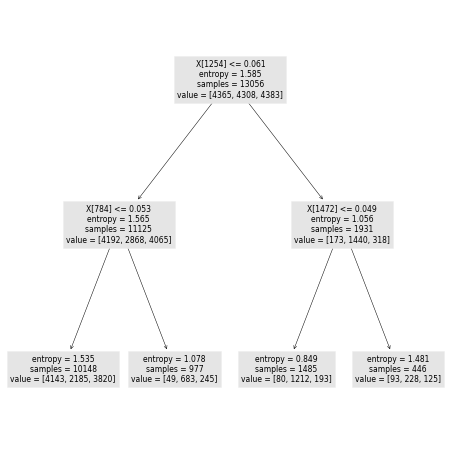

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
clf = clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(8, 8))
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
# defining parameter range
param_grid = {'n_neighbors': [i for i in range(1, 51)]}
 
grid = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', verbose=1)
 
# fitting the model for grid search
grid.fit(X_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_neighbors': 50}
KNeighborsClassifier(n_neighbors=50)


In [ ]:
# defining parameter range
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam']
}
 
grid = GridSearchCV(MLPClassifier(), param_grid, n_jobs= -1, cv=5, refit = True)
 
# fitting the model for grid search
grid.fit(X_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'activation': 'tanh', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 100, 'solver': 'sgd'}
MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50),
              max_iter=100, solver='sgd')


In [ ]:
GradientBoostingClassifier(n_estimators=30, learning_rate = 1, max_features=2, max_depth = 2, random_state = 42)

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer

# defining parameter range
param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1],
    'max_features': [20, 25, 30],
    'max_depth': [20, 25, 30]
}
# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit=True, cv=2, n_jobs=-1)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'learning_rate': 0.05, 'max_depth': 25, 'max_features': 25, 'n_estimators': 50}
GradientBoostingClassifier(learning_rate=0.05, max_depth=25, max_features=25,
                           n_estimators=50)


In [ ]:
X_train

<13056x1532 sparse matrix of type '<class 'numpy.float64'>'
	with 490646 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([1, 1, 2, ..., 0, 2, 1])